<a href="https://colab.research.google.com/github/Jenarth/SCS3250-Group-2-Final-Project/blob/master/Data_Analysis__Final_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import holidays



In [0]:
dataset = pd.read_csv("https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Final%20Dataset.csv")

# **2. Data Analysis**

One of the most important parts of the project is to analyze the dataset. Since the machine learning model will be as good as the data set you have. Data visualization and correlation let you see which one set of data may correspond to another set. After analyzing, data correlation and visualization can drive the choice of machine learning algorithms to use.  

* The autocorrelations indicate the correlation of the time series observations is calculated with values of the same series at previous times. We are going to use lags for calculating the correlation for time-series observations with previous time steps.

* Correlations show a dependency between different variables. A correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

In this part firstly we look for autocorrelation and then take a look for if there are any relationships between the variables from the dataset that is chosen out of holidays and outliers. To do this, we will use pandas, matplotlib. We will build a scatter plot to see easily if there is any “visible” correlation.

# **2.1 Autocorrelation**

We are using time series thus in this part we want to see if there is any autocorrelation of different variables. 

 We look at the following autocorrelation data:
 
1.   The autocorrelation for weekday and weekend of the Mean Temperature of the dataset. It can be seen when weekday is autocorrelated the first week, weekends are correlated almost the first 30 days.
2.   The autocorrelation for daily weather delta temperature of the dataset. The graph shows the autocorrelated at the beginning of 60 days. 
3.   The autocorrelation for Union Station Ridership of the dataset. At first, when we check daily of Union station Ridership it gives us noise. However, when we limit the average number of people using Union Station each month, the graph shows clearly that they are not auto-correlated.
4.   The autocorrelation in January of mean temperature for the 3 years of the dataset. We can see that they are auto-correlated for the first 2 days. 

In [37]:
dataset.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below
0,2017-03-01,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,-0.251613,5.851613,18.4,2.335484,16.064516,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633,False,227296.503311,254365.810172,200227.196451
1,2017-03-02,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,-0.251613,-3.648387,0.2,2.335484,-2.135484,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194,False,224966.615894,253295.696280,196637.535508
2,2017-03-03,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,-0.251613,-5.948387,0.0,2.335484,-2.335484,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753,False,204211.905405,232457.905320,175965.905490
3,2017-03-04,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,-0.251613,-8.948387,0.2,2.335484,-2.135484,0.5,928,480,7872,11756,208,0,246,13899,35389,False,45352.333333,73886.656469,16818.010198
4,2017-03-05,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,-0.251613,-5.248387,0.0,2.335484,-2.335484,0.5,803,398,4714,8381,169,0,156,8505,23126,False,32455.370861,53039.519234,11871.222488


Text(0.5, 1.0, 'Figure 1: Weakday Mean Temp (°C) Autocorrelation')

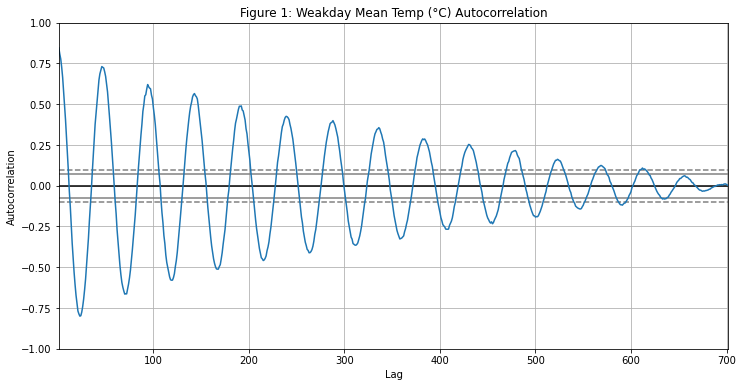

In [38]:
#Looking for the autocorrelation of the Weekday Mean Temp (°C) during whole period
from pandas.plotting import autocorrelation_plot 
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(12, 6))

dataset_Hol_Out=dataset[(-dataset.Holiday)&(-dataset.Outlier)]
monday_data = dataset_Hol_Out.loc[dataset_Hol_Out['Weekday'] == 'Monday']
tuesday_data = dataset_Hol_Out.loc[dataset_Hol_Out['Weekday'] == 'Tuesday']
wednesday_data = dataset_Hol_Out.loc[dataset_Hol_Out['Weekday'] == 'Wednesday']
thursday_data = dataset_Hol_Out.loc[dataset_Hol_Out['Weekday'] == 'Thursday']
friday_data = dataset_Hol_Out.loc[dataset_Hol_Out['Weekday'] == 'Friday']

weekday_data= pd.concat([monday_data, tuesday_data, wednesday_data, thursday_data, friday_data])

plt.figure()
pd.plotting.autocorrelation_plot(weekday_data ['Mean Temp (°C)'])
plt.title('Figure 1: Weakday Mean Temp (°C) Autocorrelation')

**- Looking at Weekend**

Text(0.5, 1.0, 'Figure 2: Weekend Mean Temp (°C) Autocorrelation')

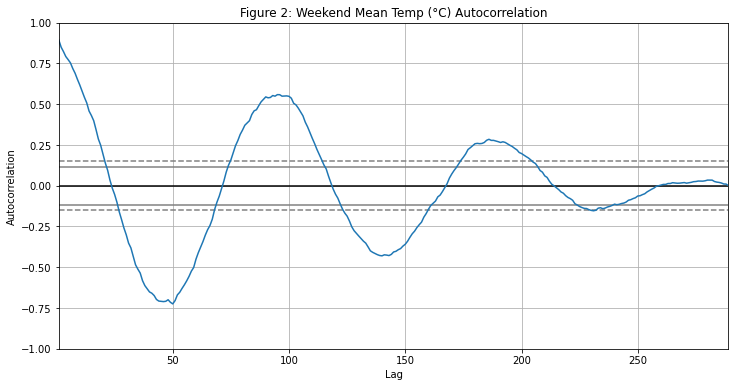

In [39]:
Saturday_data = dataset_Hol_Out.loc[(dataset_Hol_Out.Weekday=='Saturday')]
Sunday_data = dataset_Hol_Out.loc[(dataset_Hol_Out.Weekday=='Sunday')]
weekend_data= pd.concat([Saturday_data, Sunday_data])
weekend_data = weekend_data.sort_values(by='Date' ,ascending=True)

plt.figure()
pd.plotting.autocorrelation_plot(weekend_data ['Mean Temp (°C)'])
plt.title('Figure 2: Weekend Mean Temp (°C) Autocorrelation')

* While figure 1 shows weekdays of mean temparature (°C) for each day last 3 years, figure 2 demontsrate just weekends .
* The dotted lines in the above plot demostrate that statistical significance of the relation.
* When weekday are autocorrelated the first week, weekend are correlated almost the first 30 days, but as you move further away, there's less and less of a correlation.
* Also, there is a correlation of itself at a lag of 0.

**- Looking at the autocorrelation for daily weather delta temperature of dataset.**

Text(0.5, 1.0, 'Figure 3:Weather Delta Temt Daily Autocorrelation')

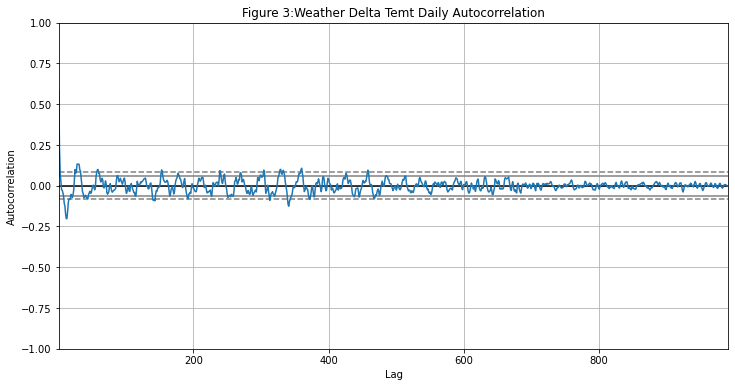

In [74]:
plt.figure()

pd.plotting.autocorrelation_plot(dataset_Hol_Out['Delta Temp (°C)'])
plt.title('Figure 3:Weather Delta Temt Daily Autocorrelation')


* The figure 3 actually shows that the autocorrelation weather 'Delta Temp (°C)' for each day.
* The dotted lines in the above plot demostrate that statistical significance of the relation.
* Looking at the autocorrelation for daily weather delta temperature, it shows autocorrelated at the beginning of 60 days but as you move further away, there's less and less of autocorrelation.
* Also, there is a correlation of itself at a lag of 0.

**- Looking at the autocorrelation for daily Union Station Ridership of dataset.**

Text(0.5, 1.0, 'Figure 4:Union Station Daily Autocorrelation')

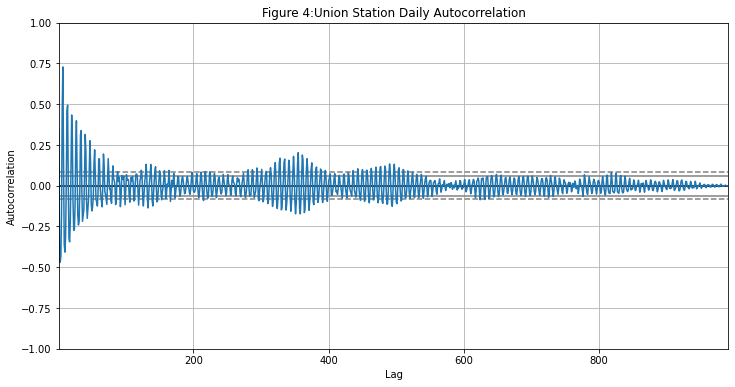

In [41]:
# The data to get the daily using for Union Station

plt.figure()
pd.plotting.autocorrelation_plot(dataset_Hol_Out['Union Station Ridership'])
plt.title('Figure 4:Union Station Daily Autocorrelation')

Text(0.5, 1.0, 'figure 5:Union Station Monthly Autocorrelation')

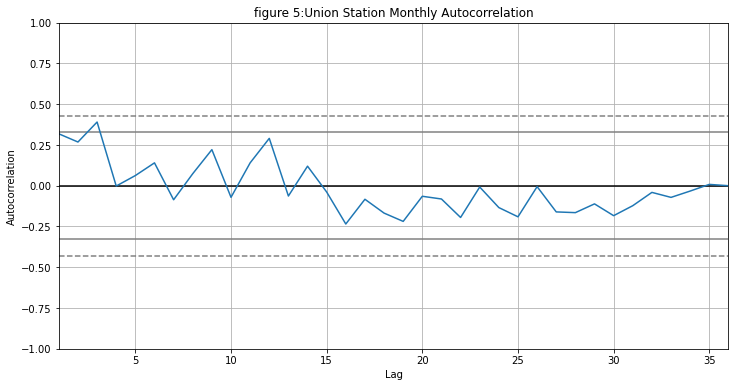

In [42]:
Union_Stat_Mean = dataset_Hol_Out.groupby(by="year_month")['Union Station Ridership'].mean()

plt.figure()
pd.plotting.autocorrelation_plot(Union_Stat_Mean)
plt.title('figure 5:Union Station Monthly Autocorrelation')

- As we can see from the figure 4 all lag values are printed, which makes the plot noisy because it shows daily usage. However the figure 5 above, when we can limit the average number of people using Union satatin each month are not auto-correlated. 
- The graph is well bellow the 95% confidence band. 
- The average number of people using Union satatin are random.

**- Looking at the autocorrelation at January of mean temparature for the 3 years of dataset.**

Text(0.5, 1.0, 'Figure 6:Mean Temp (°C) in January the last 3 years Autocorrelation')

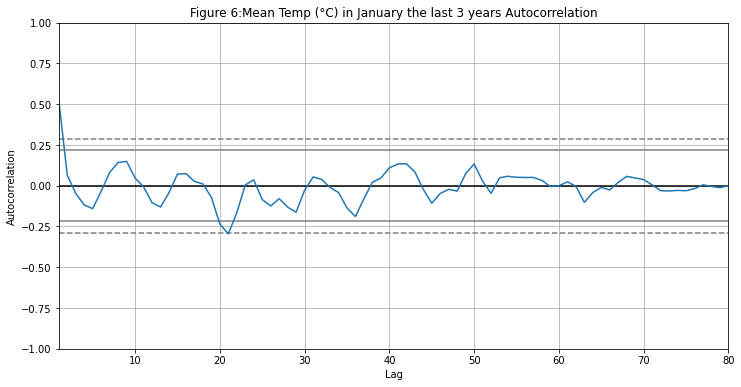

In [43]:
#Draft 13 April
Jan_2018=dataset_Hol_Out.loc[(dataset_Hol_Out['Date']>='2018-01-01') & (dataset_Hol_Out['Date']<='2018-01-31')]
Jan_2019=dataset_Hol_Out.loc[(dataset_Hol_Out['Date']>='2019-01-01') & (dataset_Hol_Out['Date']<='2019-01-31')]
Jan_2020=dataset_Hol_Out.loc[(dataset_Hol_Out['Date']>='2020-01-01') & (dataset_Hol_Out['Date']<='2020-01-31')]

January_data= pd.concat([Jan_2018, Jan_2019, Jan_2020])
January_data = January_data.sort_values(by='Date' ,ascending=True)
plt.figure()
pd.plotting.autocorrelation_plot(January_data ['Mean Temp (°C)'])
plt.title('Figure 6:Mean Temp (°C) in January the last 3 years Autocorrelation')


- The figure 6 above, shows clearly that the mean of tempature in January is auto-correlated the first 2 days. 
- The graph is well bellow the 95% confidence band. 
- The average temparatures in January go back in time the correlation fades.

# **2.2 Correlation**
 In this part, we want to see if there are any relationships between variables also analyze the relationship between the same variables and different time frames. For this, we visualize correlations with scatter matrix and pcolour as the histogram and diagonal matrix. 
 
 We look at the following correlation data:
 
1.   The correlation between daily "Delta Temp", "Total GO Ridership", "Delta Percip" and "Snow on Grnd" from the dataset. 
2.   The correlation between "Mean Temp", "Union Station Ridership", "Delta Percip" and "Snow on Grnd" on **weekdays**.
3.   The correlation between; "MeanTemp", "Union Station Ridership", "Total Percip" and "Snow on Grnd" on **weekend**.
4.   The correlation between; "MeanTemp", "Union Station Ridership", "Total Percip" and "Snow on Grnd" in **January**.


In [0]:

from pandas.plotting import autocorrelation_plot, scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(12, 6))

**- Looking at correlation between daily "Delta Temp", "Total GO Ridership", "Delta Percip" and "Snow on Grnd" from the dataset**

In [0]:
dataset_Hol_Out=dataset[(-dataset.Holiday)&(-dataset.Outlier)]
df_to_analyse = pd.concat([dataset_Hol_Out['Delta Temp (°C)'], dataset_Hol_Out['Total GO Ridership'],
                           dataset_Hol_Out['Delta Precip (mm)'], dataset_Hol_Out['Snow on Grnd (cm)']],
                          join='outer', axis = 1)


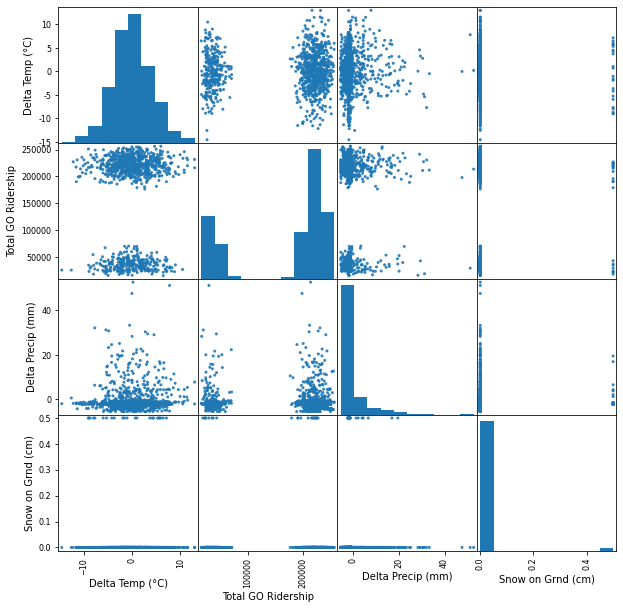

In [63]:
scatter_matrix(df_to_analyse.dropna(), alpha=0.9, figsize=(10, 10), 
               diagonal='hist');


- The previous scatterplot matrix showing all pairwise daily relationships of the four variables; "Delta Temp", "Total GO Ridership", "Delta Percip" and "Snow on Grnd" last 3 years .
- As expected when each each variables are perfectly correlated (ie. correlation = 1) to its own, they are not correlated with each other.         

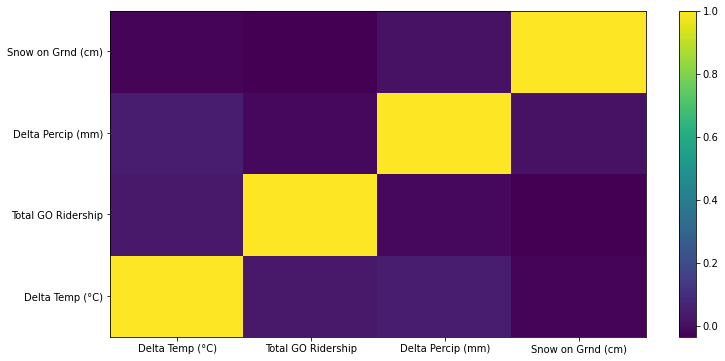

In [59]:
df_to_analyse_t = df_to_analyse.T
df_to_analyse_t.dropna(axis=1,how='all')

corr_plt = df_to_analyse_t.dropna(axis=1,how='all').values
from numpy import corrcoef, sum, log, arange
from pylab import pcolor, show, colorbar, xticks, yticks
R = corrcoef(corr_plt)
pcolor(R)

colorbar()
yticks(arange(0.5,4),['Delta Temp (°C)', 'Total GO Ridership','Delta Precip (mm)','Snow on Grnd (cm)'])
xticks(arange(0.5,4),['Delta Temp (°C)', 'Total GO Ridership','Delta Percip (mm)','Snow on Grnd (cm)'])
show()


- We can see along the diagonal that all variables are perfectly correlated with themselves.
- The rest of the matrix indicates that all variables are not correlated each others.

**- Looking at correlation between "Mean Temp (°C)", "Union Station Ridership","Total Percip (mm)" and "Snow on Grnd" on weekdays**

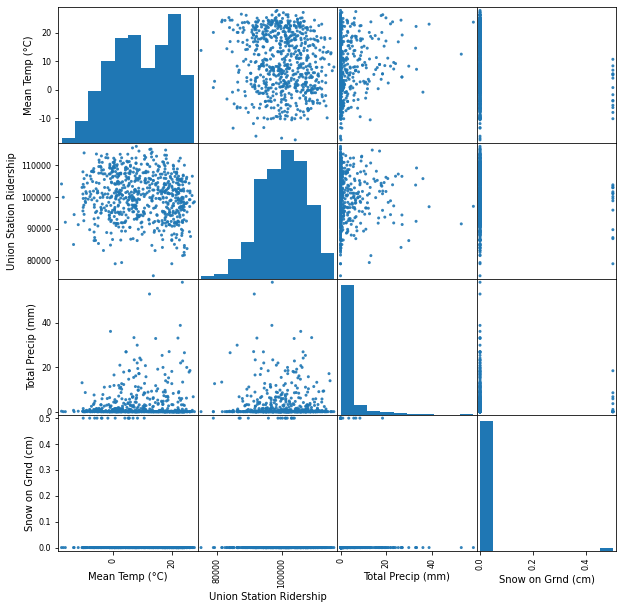

In [64]:
# What is the correlation of four variables that the same as above on weekday?

df_to_analyse_weekday_data = pd.concat([weekday_data['Mean Temp (°C)'], weekday_data['Union Station Ridership'], 
                          weekday_data['Total Precip (mm)'], weekday_data['Snow on Grnd (cm)']],                   
                        join='outer', axis = 1)

scatter_matrix(df_to_analyse_weekday_data.dropna(), alpha=0.9, figsize=(10, 10), 
               diagonal='hist');
           



- The previous scatterplot matrix showing all pairwise relationships of the four variables between "Mean Temp (°C)", "Union Station Ridership", "Total Percip" and "Snow on Grnd" on weekdays.
- As expected when each each variables are perfectly correlated (ie. correlation = 1) to its own, they are not correlated with each other.

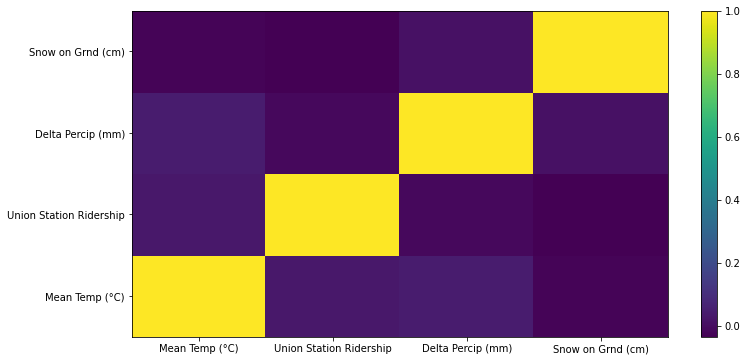

In [60]:
df_to_analyse_t = df_to_analyse.T
df_to_analyse_t.dropna(axis=1,how='all')

corr_plt = df_to_analyse_t.dropna(axis=1,how='all').values
from numpy import corrcoef, sum, log, arange
from pylab import pcolor, show, colorbar, xticks, yticks
R = corrcoef(corr_plt)
pcolor(R)

colorbar()
yticks(arange(0.5,4),['Mean Temp (°C)', 'Union Station Ridership','Total Precip (mm))','Snow on Grnd (cm)'])
xticks(arange(0.5,4),['Mean Temp (°C)', 'Union Station Ridership','Total Precip (mm)','Snow on Grnd (cm)'])
show()





- We can see clearly along the diagonal that all variables are perfectly correlated with themselves.
- The rest of the matrix indicates that all variables are not correlated each others.

- **Looking at correlation between; "MeanTemp", "Union Station Ridership", "Total Percip" and "Snow on Grnd" on weekend.**

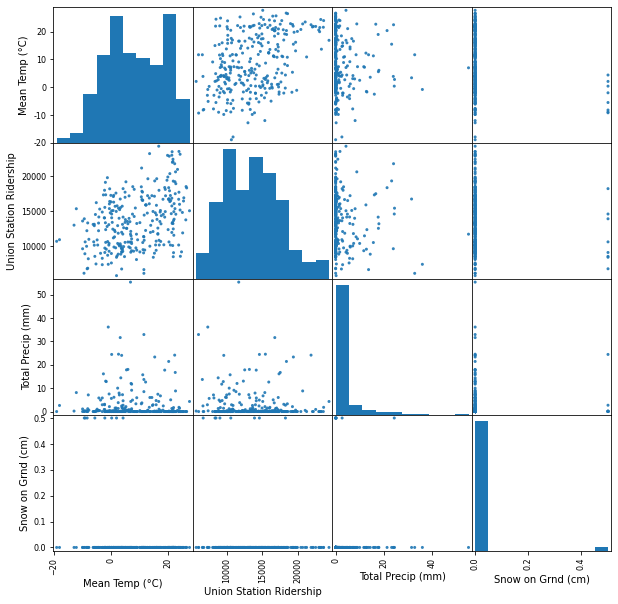

In [50]:
df_to_analyse_weekend_data = pd.concat([weekend_data['Mean Temp (°C)'], weekend_data['Union Station Ridership'], 
                          weekend_data['Total Precip (mm)'], weekend_data['Snow on Grnd (cm)']],                   
                        join='outer', axis = 1)

scatter_matrix(df_to_analyse_weekend_data.dropna(), alpha=0.9, figsize=(10, 10), 
            diagonal='hist');
      


- The previous scatterplot matrix showing all pairwise relationships of the four variables; "MeanTemp", "Union Station Ridership","Total Percip" and "Snow on Grnd"( here we use mean tempature instead of delta tempature) on weekends during tha last three years.
- As expected when each each variables are perfectly correlated (ie. correlation = 1) to its own.
- The histograms are clearly show that there is a positive correlation between the weekend average temperature and Union Station ridership. 

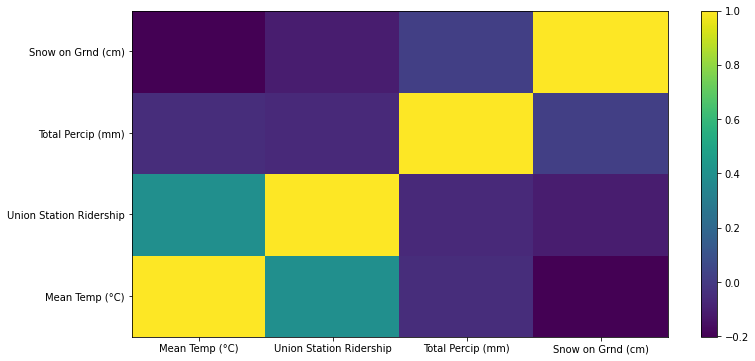

In [65]:
df_to_analyse_weekend_data_t = df_to_analyse_weekend_data.T
df_to_analyse_weekend_data_t.dropna(axis=1,how='all')    

corr_plt = df_to_analyse_weekend_data_t.dropna(axis=1,how='all').values
from numpy import corrcoef, sum, log, arange
from pylab import pcolor, show, colorbar, xticks, yticks
R = corrcoef(corr_plt)
pcolor(R)
colorbar()
yticks(arange(0.5,4),['Mean Temp (°C)','Union Station Ridership','Total Percip (mm)','Snow on Grnd (cm)'])
xticks(arange(0.5,4),['Mean Temp (°C)','Union Station Ridership','Total Percip (mm)','Snow on Grnd (cm)'])
show()


- We can see the same results of histograms along the diagonal that all variables are perfectly correlated with themselves.
- The rest of the matrix indicates that all variables are not correlated each others except mean tempature and GO ridership (across Union Station line). There is a positive relationships each other that means when tempature is increased we should expect that the number of ridership is also increased.


- **Looking at correlation between; "MeanTemp", "Union Station Ridership","Total Percip" and "Snow on Grnd" in January.**

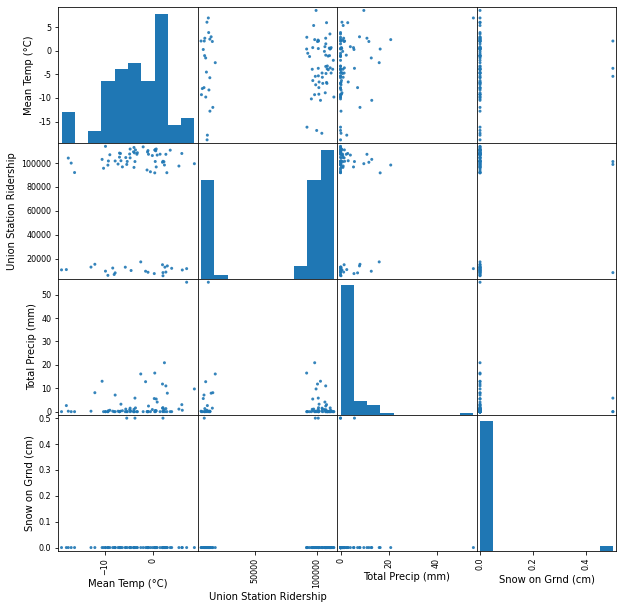

In [52]:
df_to_analyse_January_data = pd.concat([January_data['Mean Temp (°C)'], January_data['Union Station Ridership'], 
                          January_data['Total Precip (mm)'], January_data['Snow on Grnd (cm)']],                   
                        join='outer', axis = 1)

scatter_matrix(df_to_analyse_January_data.dropna(), alpha=0.9, figsize=(10, 10), 
               diagonal='hist');
           


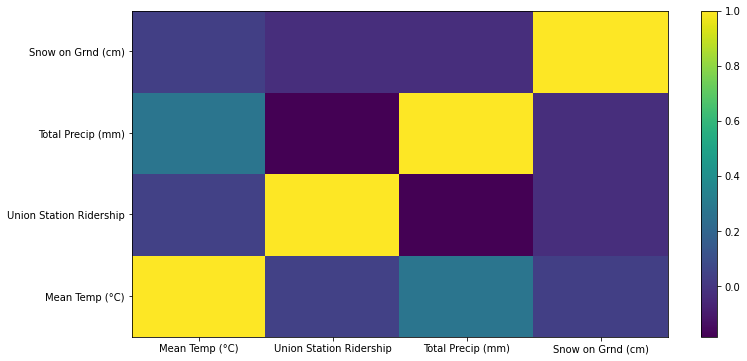

In [53]:
df_to_analyse_January_data_t = df_to_analyse_January_data.T
df_to_analyse_January_data_t.dropna(axis=1,how='all')    

corr_plt = df_to_analyse_January_data_t.dropna(axis=1,how='all').values
from numpy import corrcoef, sum, log, arange
from pylab import pcolor, show, colorbar, xticks, yticks
R = corrcoef(corr_plt)
pcolor(R)
colorbar()
yticks(arange(0.5,4),['Mean Temp (°C)','Union Station Ridership','Total Precip (mm)','Snow on Grnd (cm)'])
xticks(arange(0.5,4),['Mean Temp (°C)', 'Union Station Ridership','Total Precip (mm)','Snow on Grnd (cm)'])
show()

- The diagonal indicates that all variables; between; "MeanTemp", "Union Station Ridership","Total Percip" and "Snow on Grnd" are perfectly correlated with themselves.
- Here it interestingly shows that total precipitation and average temparature have weak positive correlations while we can not see this relationship from scatter matrix.
- The rest of the matrix indicates that all variables are not correlated each others.

In [0]:
dataset.to_csv("Final Dataset.csv")